# **exploreCSR: Exploring Data Science Research Mini-Project**

In [1]:
# Import libraries
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

In [2]:
# Upload dataset
from google.colab import files
uploaded = files.upload()

Saving chicago_dataset.csv to chicago_dataset.csv


In [3]:
# Load dataset
dataset = pd.read_csv(io.StringIO(uploaded['chicago_dataset.csv'].decode('utf-8')))
dataset.head()

,Community Area,Per Capita Income,Unemployment,Below Poverty Level,Crowded Housing,Dependency,No High School Diploma,Birth Rate,General Fertility Rate,Low Birth Weight,Prenatal Care Beginning in First Trimester,Preterm Births,Teen Birth Rate,Cancer,Lung Cancer,Breast Cancer in Females,Prostate Cancer in Males,Diabetes-related,Stroke (Cerebrovascular Disease),Infant Mortality Rate,Tuberculosis
0,DOUGLAS,23098,16.7,26.1,1.6,31.0,16.9,10.3,42.2,11.7,76.0,10.2,34.2,269.9,74.5,34.3,85.5,119.1,62.1,13.4,4.2
1,OAKLAND,19312,26.6,38.1,3.5,40.5,17.6,17.5,63.9,13.5,75.0,11.5,54.5,159.7,54.5,20.6,54.2,88.7,43.7,8.2,6.7
2,FULLER PARK,9016,40.0,55.5,4.5,38.2,33.7,11.9,60.4,17.1,71.4,14.3,69.2,258.9,89.6,8.5,70.5,111.7,82.4,22.6,0.0
3,GRAND BOULEVARD,22056,20.6,28.3,2.7,41.7,19.4,14.3,58.2,12.7,74.2,13.7,54.8,218.3,63.8,22.6,39.0,82.6,46.7,12.1,13.2
4,KENWOOD,37519,11.0,23.1,2.3,34.2,10.8,12.2,51.1,11.4,77.6,11.9,25.7,196.4,49.1,30.9,46.2,45.5,31.5,8.9,0.0


### **Part 1: Descriptive Statistics**
Computing Mean, Median, and Quartiles

In [7]:
# Compute the mean of your assigned variable
print(dataset['Below Poverty Level'].mean())

20.945205479452056


In [8]:
# Compute the median of your assigned variable
print(dataset['Below Poverty Level'].median())

18.7


In [9]:
# Compute the first, second, and third quartile of your assigned variable
print(dataset['Below Poverty Level'].quantile([0.25, 0.50, 0.75]))

0.25    12.3
0.50    18.7
0.75    27.0
Name: Below Poverty Level, dtype: float64


In [10]:
# Compute all descriptive statistics for Chicago's community areas
dataset.describe()

,Per Capita Income,Unemployment,Below Poverty Level,Crowded Housing,Dependency,No High School Diploma,Birth Rate,General Fertility Rate,Low Birth Weight,Prenatal Care Beginning in First Trimester,Preterm Births,Teen Birth Rate,Cancer,Lung Cancer,Breast Cancer in Females,Prostate Cancer in Males,Diabetes-related,Stroke (Cerebrovascular Disease),Infant Mortality Rate,Tuberculosis
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,24694.712329,13.643836,20.945205,5.050685,35.893151,22.036986,15.816438,68.394521,10.280822,76.712329,11.379452,51.608219,196.458904,52.343836,26.152055,37.821918,72.768493,47.031507,8.838356,7.036986
std,15139.410685,7.045093,11.432034,3.677413,7.364731,12.373162,3.518878,15.510497,3.915697,5.221003,2.987797,27.508230,45.636112,16.381858,9.679304,20.558982,21.275233,14.658955,4.369294,4.617223
min,8535.000000,4.200000,3.100000,0.200000,15.500000,2.900000,9.400000,27.700000,4.500000,63.600000,5.500000,1.300000,120.100000,15.900000,7.600000,0.000000,26.800000,22.000000,1.500000,0.000000
25%,15411.000000,8.100000,12.300000,2.300000,32.300000,13.500000,13.100000,60.100000,7.300000,73.300000,8.800000,34.200000,155.900000,38.300000,20.200000,19.700000,59.600000,37.900000,5.400000,3.500000
50%,20320.000000,11.800000,18.700000,4.400000,38.300000,18.600000,15.700000,68.300000,9.000000,75.900000,10.900000,50.300000,191.200000,50.900000,24.000000,33.600000,73.200000,43.500000,8.300000,6.700000
75%,27280.000000,17.700000,27.000000,6.900000,40.900000,30.300000,18.800000,80.700000,12.900000,80.300000,13.800000,68.200000,236.800000,65.100000,32.900000,52.500000,83.900000,54.900000,11.500000,9.700000
max,87163.000000,40.000000,61.400000,17.600000,50.200000,58.700000,22.400000,94.900000,19.700000,94.500000,17.500000,116.900000,291.500000,89.600000,54.700000,92.900000,119.100000,99.100000,22.600000,22.700000


**What is the mean, median, first, second, and third quartile of your assigned variable?**

*ANSWER*: Mean: 20.945205479452056
          Median: 18.7
          First Quartile: 12.3
          Second Quartile: 18.7
          Third Quartile: 27.0

### **Part 2: Data Visualization**
Making Bar Charts and Boxplots

In [12]:
# Sort dataset by your assigned variable
dataset = dataset.sort_values('Below Poverty Level')
dataset.head()

,Community Area,Per Capita Income,Unemployment,Below Poverty Level,Crowded Housing,Dependency,No High School Diploma,Birth Rate,General Fertility Rate,Low Birth Weight,Prenatal Care Beginning in First Trimester,Preterm Births,Teen Birth Rate,Cancer,Lung Cancer,Breast Cancer in Females,Prostate Cancer in Males,Diabetes-related,Stroke (Cerebrovascular Disease),Infant Mortality Rate,Tuberculosis
70,MOUNT GREENWOOD,34221,6.9,3.1,1.1,37.0,4.5,12.5,59.0,8.4,94.5,15.1,7.7,201.1,55.0,34.6,16.9,66.5,26.7,3.3,0.0
68,BEVERLY,40107,7.8,5.2,0.7,38.7,5.1,11.0,60.7,4.9,84.8,9.9,11.9,197.6,47.9,42.0,44.7,59.6,57.2,10.0,0.0
33,NORWOOD PARK,31659,7.3,5.9,2.3,40.6,13.5,10.4,59.6,4.9,89.4,8.3,3.4,180.8,44.5,20.7,26.4,47.3,45.2,4.4,1.6
59,CLEARING,23920,9.6,5.9,3.4,36.4,18.5,14.6,68.3,7.4,85.8,8.0,38.7,189.4,58.6,23.6,18.7,72.0,53.5,6.7,0.9
10,JEFFERSON PARK,27280,9.0,6.4,1.9,34.4,13.5,13.8,67.8,6.6,82.9,7.7,28.6,208.2,55.7,18.4,32.1,49.2,41.9,8.3,7.1


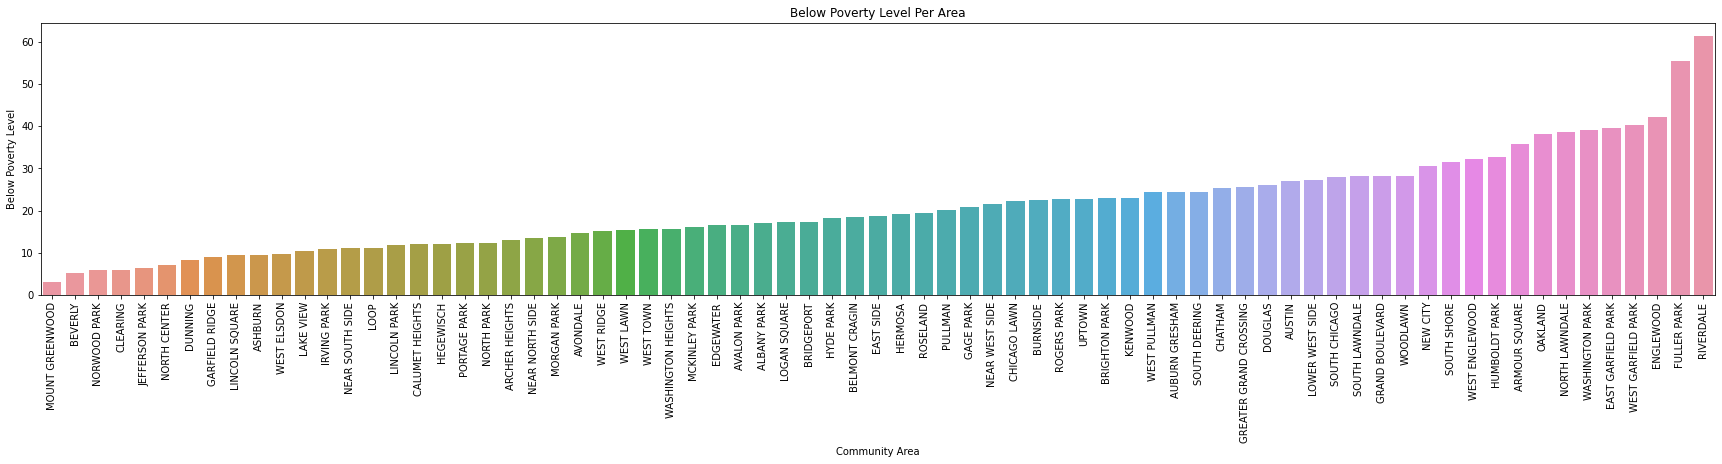

In [16]:
# Make bar chart of your assigned variable
plt.figure(figsize=(30,5)) # Set figure size (if needed)
ax = sns.barplot(x = 'Community Area', y = 'Below Poverty Level', data = dataset, ci = None) # Make bar chart
ax.set(title = 'Below Poverty Level Per Area', xlabel = 'Community Area', ylabel = 'Below Poverty Level') # Set chart title and axis labels
ax.tick_params(axis='x', rotation=90) # Rotate x-axis labels (if needed)

[Text(0, 0.5, 'Below Poverty Level'),
 Text(0.5, 1.0, 'Box Plot of Below Poverty Level')]

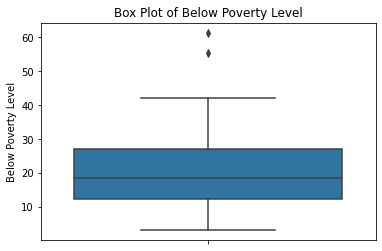

In [17]:
# Make box plot of your assigned variable
ax = sns.boxplot(y = 'Below Poverty Level', data = dataset) # Make box plot
ax.set(title = 'Box Plot of Below Poverty Level', ylabel = 'Below Poverty Level')

### **Part 3: Classification**
Training and Testing Decision Trees

**Create class label**

In [37]:
# Create class label for your assigned variable (based on chosen cut-off value)
def create_class_label (row):
    cutoff = 20
    if row['Below Poverty Level'] > cutoff:
        return 1 # value of assigned variable > cutoff
    return 0 # value of assigned varlue <= cutoff

In [36]:
dataset['Class Label'] = dataset.apply(lambda row: create_class_label (row), axis = 1)
dataset.head()

,Community Area,Per Capita Income,Unemployment,Below Poverty Level,Crowded Housing,Dependency,No High School Diploma,Birth Rate,General Fertility Rate,Low Birth Weight,Prenatal Care Beginning in First Trimester,Preterm Births,Teen Birth Rate,Cancer,Lung Cancer,Breast Cancer in Females,Prostate Cancer in Males,Diabetes-related,Stroke (Cerebrovascular Disease),Infant Mortality Rate,Tuberculosis,Class Label
70,MOUNT GREENWOOD,34221,6.9,3.1,1.1,37.0,4.5,12.5,59.0,8.4,94.5,15.1,7.7,201.1,55.0,34.6,16.9,66.5,26.7,3.3,0.0,0
68,BEVERLY,40107,7.8,5.2,0.7,38.7,5.1,11.0,60.7,4.9,84.8,9.9,11.9,197.6,47.9,42.0,44.7,59.6,57.2,10.0,0.0,0
33,NORWOOD PARK,31659,7.3,5.9,2.3,40.6,13.5,10.4,59.6,4.9,89.4,8.3,3.4,180.8,44.5,20.7,26.4,47.3,45.2,4.4,1.6,0
59,CLEARING,23920,9.6,5.9,3.4,36.4,18.5,14.6,68.3,7.4,85.8,8.0,38.7,189.4,58.6,23.6,18.7,72.0,53.5,6.7,0.9,0
10,JEFFERSON PARK,27280,9.0,6.4,1.9,34.4,13.5,13.8,67.8,6.6,82.9,7.7,28.6,208.2,55.7,18.4,32.1,49.2,41.9,8.3,7.1,0


**Divide the dataset into a training set (75% of the data) and a test set (25% of the data).**

In [184]:
# Partition dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(dataset[['No High School Diploma','Crowded Housing','Unemployment']],
                                                    dataset['Class Label'],
                                                    test_size = 0.25,
                                                    random_state = 1)  # (predictors, class, test size, random state)

**<u>Using the training set</u>, build a decision tree to predict the class label based on the predictors.**

In [185]:
# Build decision tree
model = tree.DecisionTreeClassifier()
model.fit(x_train, y_train) # (predictors, class)

DecisionTreeClassifier()

[Text(0.36363636363636365, 0.9444444444444444, 'Unemployment <= 10.65\nsamples = 54\nvalue = [30, 24]\nclass = <=20'),
 Text(0.18181818181818182, 0.8333333333333334, 'Crowded Housing <= 4.5\nsamples = 23\nvalue = [22, 1]\nclass = <=20'),
 Text(0.09090909090909091, 0.7222222222222222, 'samples = 16\nvalue = [16, 0]\nclass = <=20'),
 Text(0.2727272727272727, 0.7222222222222222, 'Crowded Housing <= 4.7\nsamples = 7\nvalue = [6, 1]\nclass = <=20'),
 Text(0.18181818181818182, 0.6111111111111112, 'samples = 1\nvalue = [0, 1]\nclass = >20'),
 Text(0.36363636363636365, 0.6111111111111112, 'samples = 6\nvalue = [6, 0]\nclass = <=20'),
 Text(0.5454545454545454, 0.8333333333333334, 'Crowded Housing <= 1.3\nsamples = 31\nvalue = [8, 23]\nclass = >20'),
 Text(0.45454545454545453, 0.7222222222222222, 'samples = 2\nvalue = [2, 0]\nclass = <=20'),
 Text(0.6363636363636364, 0.7222222222222222, 'Unemployment <= 18.15\nsamples = 29\nvalue = [6, 23]\nclass = >20'),
 Text(0.5454545454545454, 0.611111111111

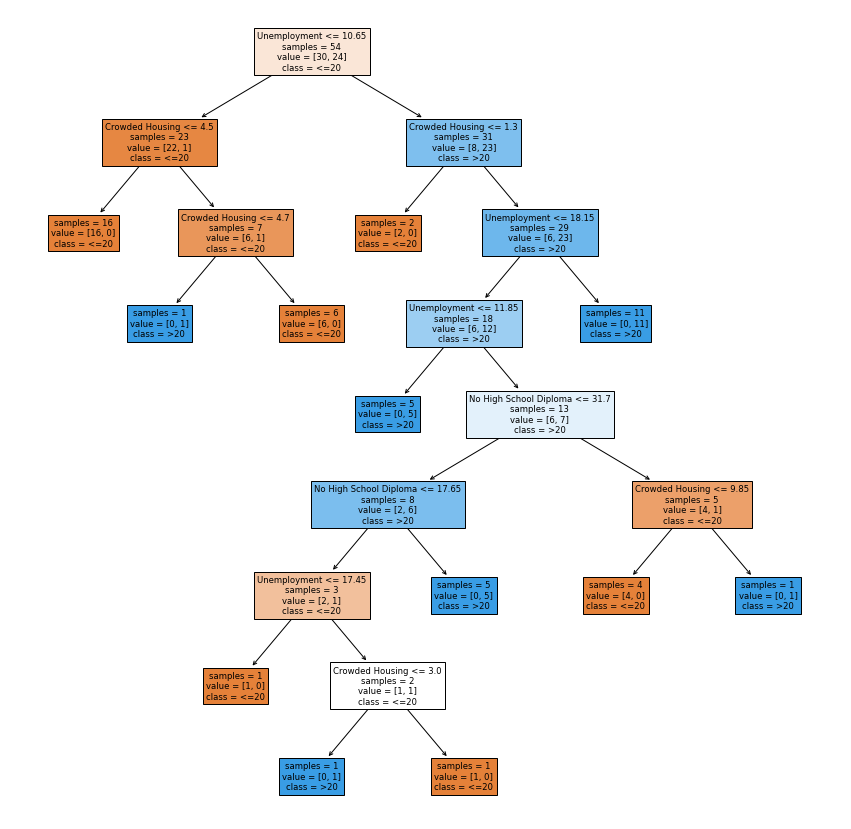

In [186]:
# Plot decision tree
plt.figure(figsize = (15,15)) # Set figure size (if needed)
tree.plot_tree(model, feature_names = ['No High School Diploma','Crowded Housing','Unemployment'],      # feature_names indicates the names of the predictors
               class_names = ['<=20', '>20'],               # class_names indicates the names of the classes
               filled = True, impurity = False)
# IMPORTANT: class names must be given in ascending order (0, 1)

**Evaluate the performance of this decision tree <u>on the test set</u>.** 

In [187]:
# Predict class labels for test set
y_pred = model.predict(x_test)
print(y_pred) # Print predicted class labels

[0 1 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 1 1]


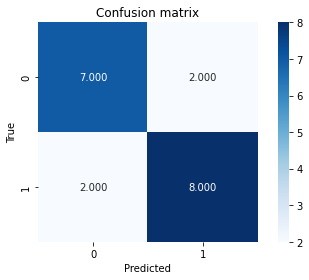

In [188]:
# Plot confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred) # Create confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues) # Plot confusion matrix
plt.ylabel('True') # Set y-axis label
plt.xlabel('Predicted') # Set x-axis label
plt.title('Confusion matrix') # Set chart title
plt.tight_layout()

In [189]:
# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # Compute accuracy
print(1-metrics.accuracy_score(y_test, y_pred)) # Compute error

0.7894736842105263
0.21052631578947367


**What is the accuracy and error of the decision tree on the test set?**

*ANSWER*: 0.78(Accuracy)
          0.21(Error)

**Would you say this decision tree is doing a good job at predicting the class labels for the test set? Why or why not?**

*ANSWER*: Yes, because the accuracy is around 78%